In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.fetch_lfw_people(min_faces_per_person = 60)

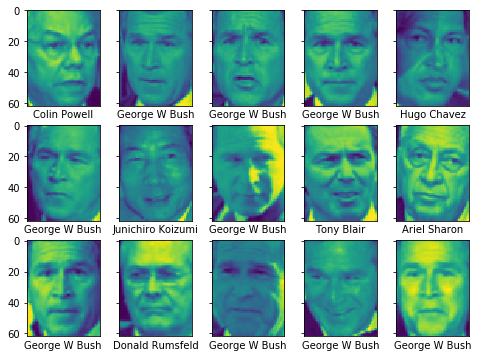

In [2]:
fig, axes = plt.subplots(ncols=5,nrows=3, sharex=True, sharey=True, figsize = (8,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i])
    ax.set_xlabel(data.target_names[data.target[i]])
    ax.set_xticks([])

plt.show()

In [3]:
from sklearn import svm

model = svm.SVC(kernel = 'rbf')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.3, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
print(model.score(X_train,Y_train))
model.score(X_test,Y_test)

0.968186638388123


0.762962962962963

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,5,10,50], 'gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model,param_grid, n_jobs = -1, verbose = 2)

In [9]:
%time grid.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


Wall time: 2min 1s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [10]:
print(grid.best_params_)
print(grid.score(X_train,Y_train))
grid.score(X_test,Y_test)

{'C': 5, 'gamma': 0.0001}
0.985153764581124


0.8222222222222222

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True, random_state=42)

In [12]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(943, 371)

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear'],
    'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, verbose=1)

In [45]:
grid.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   53.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [47]:
grid.best_estimator_.score(X_test_pca, Y_test)

0.7580246913580246

In [48]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}

In [49]:
y_pred = grid.best_estimator_.predict(X_test_pca)

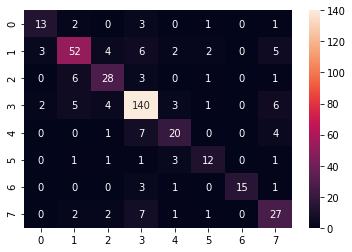

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

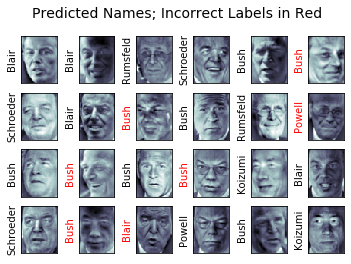

In [54]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(data.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == Y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)